# Import modello SAA+

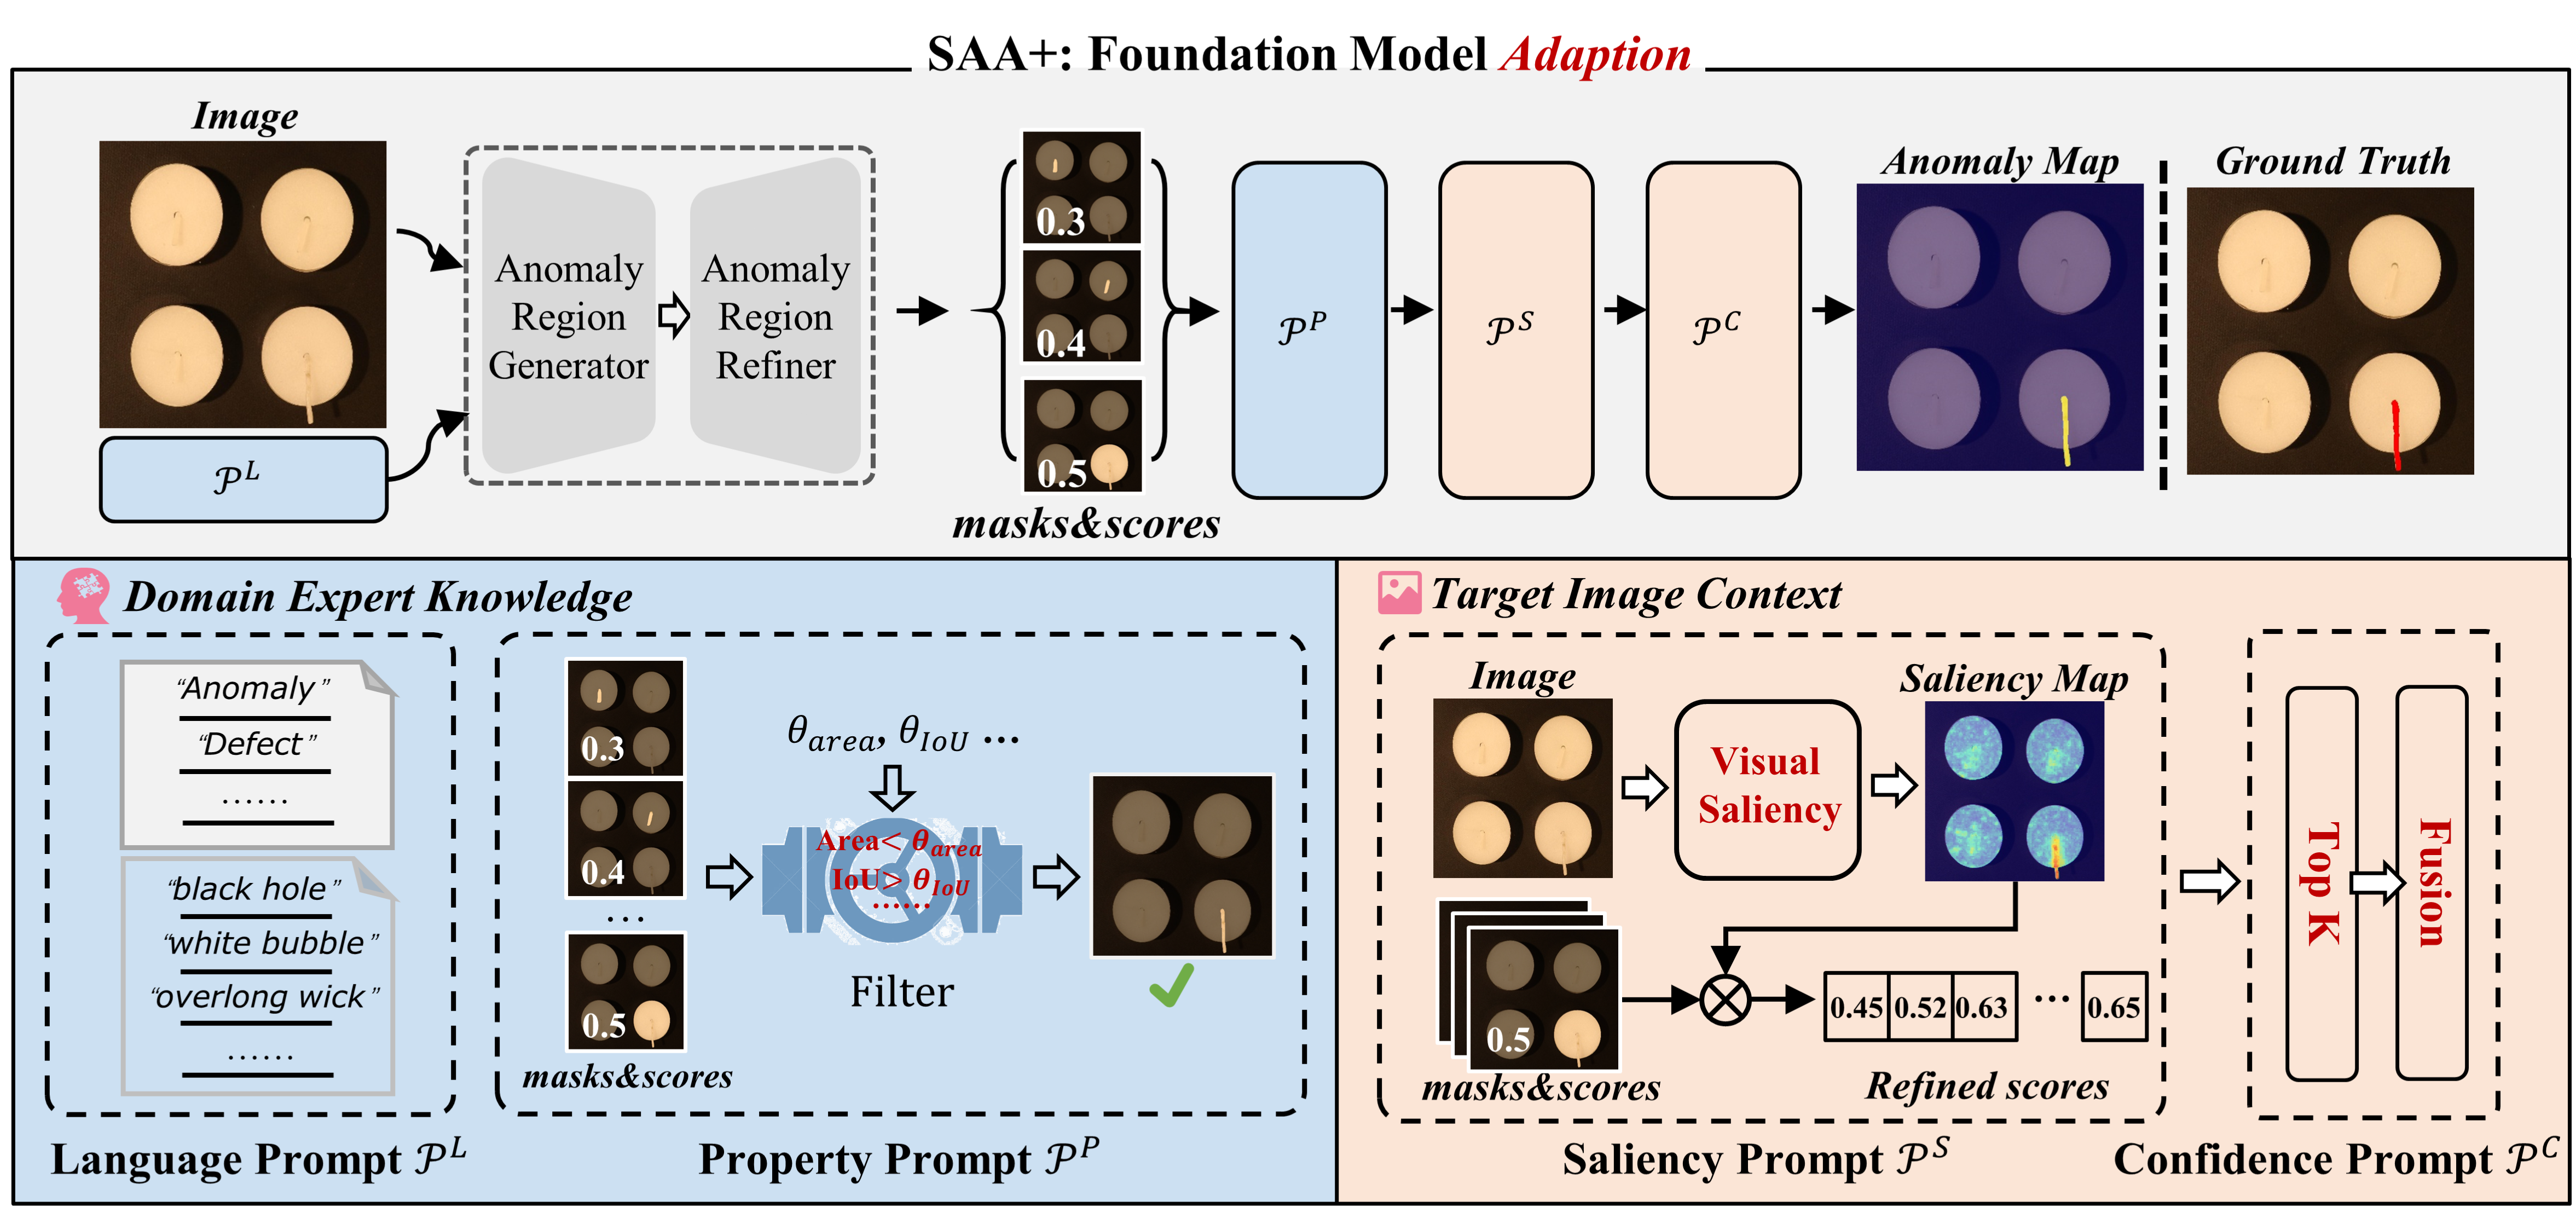

In [ ]:
!git clone https://github.com/caoyunkang/Segment-Any-Anomaly.git
%cd Segment-Any-Anomaly/
!ls

Cloning into 'Segment-Any-Anomaly'...
remote: Enumerating objects: 410, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 410 (delta 37), reused 38 (delta 36), pack-reused 352
Receiving objects: 100% (410/410), 51.76 MiB | 36.00 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/Segment-Any-Anomaly
app.py	  demo.py	 install.sh    run_MTD.py	     run_VisA_public.py  utils
assets	  eval_SAA.py	 README.md     run_MVTec.py	     SAA
datasets  GroundingDINO  run_KSDD2.py  run_VAND_workshop.py  SAM


In [ ]:
%cd GroundingDINO/
!pip install -e .
%cd ../SAM
!pip install -e .
!pip install opencv-python pycocotools matplotlib onnxruntime onnx ipykernel gradio loguru

/content/Segment-Any-Anomaly/GroundingDINO
Obtaining file:///content/Segment-Any-Anomaly/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00
  Running setup.py develop for groundingdino
/content/Segment-Any-Anomaly/SAM
Obtaining file:///content/Segment-Any-Anomaly/SAM
  Preparing metadata (setup.py) ... done
  Running setup.py develop for SAM
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.9 MB/s eta 0:00:00
  Prepari

In [ ]:
%cd ..
%mkdir weights
%cd ./weights
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
%cd ..

/content/Segment-Any-Anomaly
/content/Segment-Any-Anomaly/weights
--2024-02-16 09:06:23--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.34, 3.162.163.11, 3.162.163.19, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   240MB/s    in 12s     

2024-02-16 09:06:36 (198 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

--2024-02-16 09:06:36--  https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercont

In [ ]:
import sys
sys.path.append('./GroundingDINO')
sys.path.append('./SAM')
sys.path.append('.')
import matplotlib.pyplot as plt
import SAA as SegmentAnyAnomaly
from utils.training_utils import *
import os

%matplotlib inline

# Inizializzazione modello SAA+

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
gpu_id = 0

os.environ['CURL_CA_BUNDLE'] = ''
os.environ['CUDA_VISIBLE_DEVICES'] = f"{gpu_id}"


dino_config_file = 'GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py' #definisco una variabile che si riferisce a uno specifico path
dino_checkpoint = 'weights/groundingdino_swint_ogc.pth' #anche qui
sam_checkpoint = 'weights/sam_vit_h_4b8939.pth' #

box_threshold = 0.1
text_threshold = 0.1
eval_resolution = 1024

root_dir = 'result'  #

# get the model in SAA/model.py trovi implementazione della classe
model = SegmentAnyAnomaly.Model(
    dino_config_file=dino_config_file, #the config file for DINO
    dino_checkpoint=dino_checkpoint, #the path of checkpoint for DINO installati in precendenza
    sam_checkpoint=sam_checkpoint, #the path of checkpoint for SAM installati in precendenza
    box_threshold=box_threshold, #the threshold for box filter
    text_threshold=text_threshold, #the threshold for box filter(?)
    out_size=eval_resolution, #the desired output resolution of anomaly map
    device=device, #the running device, 'cuda:0'
)

model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

build_sam_vit_h
wide_resnet50_2


model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

# Download foto dal drive e creazione dataset

In [ ]:
import os
import torch
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive',force_remount=True)
DATA_DIR = os.path.join("drive", "MyDrive", "Canopies-data")

torch.manual_seed(42)


Mounted at /content/drive


**Classe e funzioni che permettono la realizzazione dei dataset di train, val, test**

In [ ]:
import random

#classe per la creazione di dataset
class CanopiesDataset(torch.utils.data.Dataset):
  def __init__(self, root_dir, classe = "every", scale = "every"):

    self.root_dir = root_dir
    self.class_names = sorted(os.listdir(root_dir), reverse=True)
    self.image_paths=[]

    for class_name in self.class_names:
      class_dir = os.path.join(root_dir, class_name)
      scale_dirs = os.listdir(class_dir)
      for scale_dir in scale_dirs:
        scale_path = os.path.join(class_dir, scale_dir)
        image_names = os.listdir(scale_path)
        for image_name in image_names:
          if image_name.endswith(".jpg"):
            if "hdr" not in image_name.lower():
              if ( classe == "every" or classe == class_name):
                    if (scale == "every" or scale == scale_dir):
                        image_path = os.path.join(scale_path, image_name)
                        self.image_paths.append((image_path, self.class_names.index(class_name)))

  def __len__(self):
        return len(self.image_paths)

  def __getitem__(self, idx):
        image_path, label = self.image_paths[idx]
        return image_path, label


def check_index(index, dataset):
  dataset_size = len(dataset)
  if(index > dataset_size):
    raise IndexError("Index out of bounds")
  return 1


def distribution(dataset, titolo):
    labels = np.array(list(zip(*dataset))[1])
    count_0 = np.sum(labels == 0)
    count_1 = len(labels) - count_0
    labels_count = np.array([count_0, count_1])
    class_names = ["good", "bad"]

    plt.figure(figsize=(8, 4))
    plt.title('Data distribution of '+ titolo)
    plt.bar(class_names, labels_count, width=.5, color = ['C0', 'C1'])
    plt.show()
    print(labels_count)


##Divisione train-validation-test set


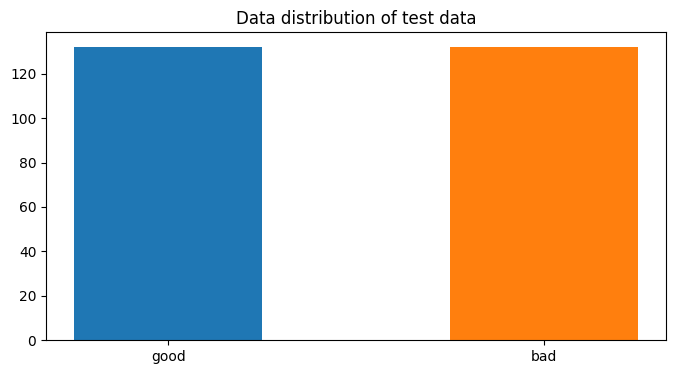

[132 132]


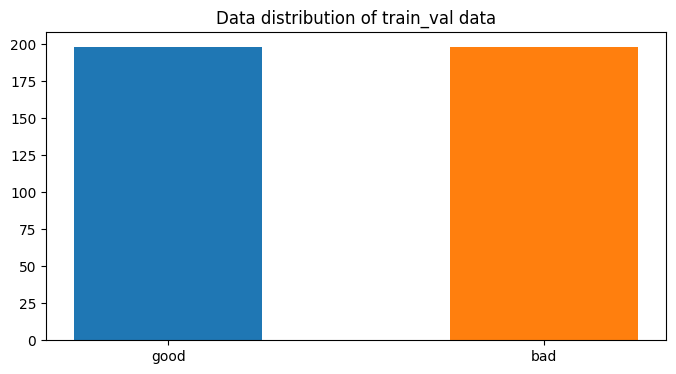

[198 198]


In [ ]:

def check_index(index, dataset):
  dataset_size = len(dataset)
  if(index > dataset_size):
    raise IndexError("Index out of bounds")
  return 1

def split_dataset_new(dataset_TEST, test_perc):
    num_da_prendere = int(330 -( (1.0 - test_perc)*330 ))

    random.shuffle(dataset_TEST)

    test_set = []
    for i in range(num_da_prendere):
        check_index(i, dataset_TEST)
        test_set.append(dataset_TEST[i])
    return test_set


class_names = sorted(os.listdir("/content/drive/MyDrive/first_dataset"), reverse = True)

dataset_good_1  = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset",  classe="good", scale = "scale_1" )
dataset_good_15 = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset",  classe="good", scale = "scale_1.5" )
dataset_good_2  = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset",  classe="good", scale = "scale_2" )

dataset_bad_1  = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset", classe = "bad", scale = "scale_1")
dataset_bad_15 = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset", classe = "bad", scale = "scale_1.5")
dataset_bad_2  = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset", classe = "bad", scale = "scale_2")


all_data_GOOD = dataset_good_1 + dataset_good_15 + dataset_good_2
all_data_BAD = dataset_bad_1 + dataset_bad_15 + dataset_bad_2

data_list_GOOD = [x for x in all_data_GOOD]
data_list_BAD = [x for x in all_data_BAD]

random.shuffle(data_list_GOOD)
random.shuffle(data_list_BAD)

data_list_BAD = data_list_BAD[:330]
data_list_GOOD = data_list_GOOD[:330]

data_list_ALL_DATA = data_list_GOOD + data_list_BAD

test_perc = 0.4

test_dataset_good = split_dataset_new(data_list_GOOD,test_perc)
test_dataset_bad = split_dataset_new(data_list_BAD,test_perc)

test_set = test_dataset_bad + test_dataset_good

distribution(test_set, "test data")

for j in range(len(test_set)):
  if (test_set[j] in data_list_ALL_DATA) :
      data_list_ALL_DATA.remove(test_set[j])

train_val_set = data_list_ALL_DATA
distribution(train_val_set, "train_val data")


# Set di funzioni chiave

### Features extraction

funzioni per features extraction dalla matrice score restituita da modello Saa++

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import feature
from scipy.stats import skew, kurtosis, entropy
import pywt
from skimage.feature import greycomatrix

def print_feature_values(feature_values):

    feature_names = ['mean_val', 'sum_value', 'std_deviation', 'max_val', 'variance',
                 'energy', 'autocorrelation', 'edge_detection', 'wavelet_coeffs_sum',
                  'gradient_sum', 'laplacian_sum', 'fft_sum']

    for name, value in zip(feature_names, feature_values):
        print(f"{name}: {value}")

def calculate_additional_features(matrix):
    mean_val = np.mean(matrix)
    sum_value = np.sum(matrix)
    std_deviation = np.std(matrix)

    max_val = np.max(matrix)

    variance = np.var(matrix)

    energy = np.sum(matrix**2)

    autocorrelation = np.mean(matrix * np.roll(matrix, shift=(1, 1), axis=(0, 1)))
    edge_detection = np.sum(np.abs(np.diff(matrix, axis=0))) + np.sum(np.abs(np.diff(matrix, axis=1)))

    # Wavelet coefficients
    coeffs = pywt.dwt2(matrix, 'bior1.3')

    # Local gradients
    gradients_x = cv2.Sobel(matrix, cv2.CV_64F, 1, 0, ksize=3)
    gradients_y = cv2.Sobel(matrix, cv2.CV_64F, 0, 1, ksize=3)

    # Laplace filter
    laplacian = cv2.Laplacian(matrix, cv2.CV_64F)

    # Fourier Transform
    fft_result = np.fft.fft2(matrix)

    features_value = [mean_val, sum_value, std_deviation, max_val,  variance,   energy,
            autocorrelation, edge_detection, coeffs[0].sum(),
            np.sum(np.abs(gradients_x)) + np.sum(np.abs(gradients_y)),
            np.sum(np.abs(laplacian)),
            np.sum(np.abs(fft_result)) ]

    #print_feature_values( features_value )
    return features_value



### Normalizzazione dataframe

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

#normalizzazione standard
def norm_dataset(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

### Funzioni relative a modello OneClass

In [ ]:
from sklearn.svm import OneClassSVM
import itertools
import pandas as pd
from itertools import product

def One_class_svm_init(kernel, nu, gamma, degree, coef0):
  params = {
    'kernel': kernel,
    'nu': nu
  }

  if degree is not None:
    params['degree'] = degree
  if gamma is not None:
    params['gamma'] = gamma
  if coef0 is not None:
    params['coef0'] = coef0

  # Crea modello in base ai parametri effettivi diversi da None
  svm_model = OneClassSVM(**params)
  return svm_model

def OneClass_fit_predict( strg, model, X_train, X_test ):
  model.fit(X_train)
  predictions = model.predict(X_test)

  if strg == "BAD":
    predictions[predictions == 1] = 1
    predictions[predictions == -1] = 0

  if strg == "GOOD":
    predictions[predictions == 1] = 0
    predictions[predictions == -1] = 1

  return predictions


def filter_hyp_combination(all_combinations):
  filtered_combinations = []
  for combination in all_combinations:
      kernel, degree, gamma, coef, nu = combination
      if kernel == 'poly':
        #degree lo usa solo poly
        combo = (kernel, degree, gamma, coef, nu)

      if kernel == 'linear':
        # Per il kernel 'linear', gamma e degree e coef non sono utilizzati
        combo = (kernel, None, None, None, nu)

      if kernel == 'rbf':
        # Per il kernel 'rbf', degree e coef non è utilizzato
        combo = (kernel, None, gamma, None, nu)

      if kernel == 'sigmoid':
        #per sigmoid
        combo = (kernel, None, gamma, coef, nu)

      # Aggiungi la combinazione filtrata alla lista delle combinazioni filtrate
      filtered_combinations.append(combo)

  # Rimuovi combinazioni duplicate nel caso ci fossero
  unique_combinations = list(set(filtered_combinations))
  return unique_combinations

def find_best_hyperparam(strg, feature_names, X_train, X_val, Y_val, verbose):

  kernels = ['sigmoid','poly','rbf','linear']
  degrees = [2, 3, 4]
  gammas = [0.1, 0.5, 0.9]
  coefs = [0.1, 0.5, 0.9]
  nu = [0.1, 0.5, 0.9]

  all_combinations = list(product(kernels, degrees, gammas, coefs, nu))
  usefull_hyp_combination = filter_hyp_combination(all_combinations)

  best_hyperparam_combo = ""
  overall_best_f1 = 0

  for combination in usefull_hyp_combination:
    kernel, degree, gamma, coef, nu = combination
    model = One_class_svm_init(kernel, nu, gamma, degree, coef)

    f1_mean = Cross_validation_V2(strg, feature_names, model, X_train, X_val, Y_val) #versione con k fold su X_train e X_val
    if f1_mean > overall_best_f1:
      overall_best_f1 = f1_mean
      best_hyperparam_combo = combination

  if(verbose == True):
    print(f"\nMigliore combinazione di Iperparametri è: {best_hyperparam_combo}, con f1-score-mean: {round(overall_best_f1, 4)}\n") #print(f"\nMigliore combinazione di Iperparametri è: {best_hyperparam_combo}, con f1-score-mean: {overall_best_f1} \n")

  return overall_best_f1, best_hyperparam_combo


In [ ]:
import warnings
from sklearn.metrics import precision_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics')

def evaluate_metrics(predictions, Y_test ):

  accuracy = accuracy_score(np.array(Y_test).ravel(), predictions)
  f_1 = f1_score(np.array(Y_test).ravel(), predictions )
  classification_report_str = classification_report(Y_test, predictions)
  #print('Classification Report:\n\n',classification_report_str)
  return f_1, accuracy

### Cross-validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import classification_report, accuracy_score

def Cross_validation_V2(strg, feature_names, model, X_train, X_val, Y_val):

  df_train = pd.DataFrame(X_train, columns=feature_names)
  df_val =  pd.DataFrame(X_val, columns=feature_names)

  X_train_selected = df_train.to_numpy()
  X_val_selected = df_val.to_numpy()

  k_fold_splits = 5
  kf = KFold(n_splits=k_fold_splits, shuffle=False)

  k_fold_splits_VAL = 3
  kf_val = KFold(n_splits=k_fold_splits_VAL, shuffle=False)

  f1_sum = 0

  for train_index, test_index in kf.split(X_train_selected):

      X_train_fold_bad, X_val_fold = X_train_selected[train_index], X_train_selected[test_index]
      Y_val_fold = []
      if strg == "BAD":
        Y_val_fold = np.ones((len(X_val_fold), 1), dtype=int)
      if strg == "GOOD":
       Y_val_fold = np.zeros((len(X_val_fold), 1), dtype=int)

      Y_val_tmp = np.concatenate((Y_val, Y_val_fold), axis=0)
      df_val_fold = pd.DataFrame(X_val_fold, columns=feature_names)

      df_to_val = pd.concat([df_val, df_val_fold])
      X_val = df_to_val.to_numpy()  # Dataset di validazione

      for index_val, index_esclusi in kf_val.split(X_val):

        X_val_inclusi, X_esclusi = X_val[index_val], X_val[index_esclusi]
        Y_val_inclusi, Y_esclusi = Y_val_tmp[index_val],Y_val_tmp[index_esclusi]
        predictions = OneClass_fit_predict(strg, model, X_train_fold_bad, X_val_inclusi)
        f1, accuracy = evaluate_metrics(predictions, Y_val_inclusi)
        f1_sum = f1_sum + f1

  f1_mean_k_fold = f1_sum/(k_fold_splits * k_fold_splits_VAL)
  return f1_mean_k_fold


### Obtain score matrix from pictures


In [ ]:

def obtain_score_matrix_dynamic_prompt( dataset ,num_obj, num_anomaly, anomaly_area):

    textual_prompt_grapes = [  ['deformed. crooked ','grapes'], ['irregular', 'grapes'] ]
    property_text_prompts_dynamic = 'the image of grapes have '+num_obj+' dissimilar grapes, with a maximum of '+num_anomaly+' anomaly. The anomaly would not exceed '+anomaly_area+' object area. '
    model.set_ensemble_text_prompts(textual_prompt_grapes, verbose=False)
    model.set_property_text_prompts(property_text_prompts_dynamic, verbose=False)

    X = []
    Y = []

    for idx in range(len(dataset)):
        check_index(idx, dataset )
        image_path_grapes, label = dataset[idx]
        image_grapes = cv2.imread(image_path_grapes)

        try:
          score, appendix = model(image_grapes)  # score mappa con puntaggio di anomalie
        except Exception as e:
          #print(f"Errore durante l'esecuzione di model: {e}\n")
          continue

        similarity_map = appendix['similarity_map']

        image_show = cv2.cvtColor(image_grapes, cv2.COLOR_BGR2RGB)
        image_show = cv2.resize(image_show, (eval_resolution, eval_resolution))
        similarity_map = cv2.resize(similarity_map, (eval_resolution, eval_resolution))
        score = cv2.resize(score, (eval_resolution, eval_resolution))

        additional_features = calculate_additional_features(score)

        X.append(additional_features)
        label_a = [label]
        Y.append(label_a)

    #print("Numero di campioni: ", len(X) )#num campioni usciti senza errore da obtain score matrix
    return X, Y

###Divisione val train

In [ ]:
#Split train val

import pandas as pd

def split_train_val(strg, df_train_val, perc):

  # Filtrare per gt = 1
  df_1 = df_train_val[df_train_val['gt'] == 1]
  # Filtrare per gt = 0
  df_0 = df_train_val[df_train_val['gt'] == 0]

  if strg == "BAD":
    n_samples = int(df_1.shape[0] * perc)
    df_val = df_1.sample(n=n_samples)
    df_1 = df_1.drop(df_val.index)
    df_0 = pd.concat([df_0, df_val])

  if strg == "GOOD":
    n_samples = int(df_0.shape[0] * perc)
    df_val = df_0.sample(n=n_samples)
    df_0 = df_0.drop(df_val.index)
    df_1 = pd.concat([df_1, df_val])

  # Prendere le colonne gt
  Y_df_1 = df_1['gt']
  Y_df_0 = df_0['gt']

  # Rimuovere colonna gt
  df_1.drop(columns=['gt'], inplace=True)
  df_0.drop(columns=['gt'], inplace=True)

  if strg == "BAD":
    return df_1, df_0, Y_df_1, Y_df_0
  if strg == "GOOD":
    return df_0, df_1, Y_df_0, Y_df_1

In [ ]:
import warnings

warnings.simplefilter("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
def allenamento_validazione_BAD(strg_bad, df_train_val, perc, feature_names, verbose):
    df_trainig, df_validation, Y_train, Y_val = split_train_val(strg_bad, df_train_val, perc)

    Y_train = np.array(Y_train).reshape(-1,1)
    Y_val = np.array(Y_val).reshape(-1,1)
    X_train = df_trainig.to_numpy()
    X_val = df_validation.to_numpy()

    X_train_norm = norm_dataset(X_train)
    X_val_norm = norm_dataset(X_val)

    overall_best_f1, best_hyperparam_combo_BAD = find_best_hyperparam(strg_bad, feature_names, X_train_norm, X_val_norm, Y_val, verbose)
    return overall_best_f1, best_hyperparam_combo_BAD

def allenamento_validazione_GOOD(strg_good, df_train_val, perc, feature_names, verbose):
    df_trainig, df_validation, Y_train, Y_val = split_train_val(strg_good, df_train_val, perc)

    Y_train = np.array(Y_train).reshape(-1,1)
    Y_val = np.array(Y_val).reshape(-1,1)
    X_train = df_trainig.to_numpy()
    X_val = df_validation.to_numpy()

    X_train_norm = norm_dataset(X_train)
    X_val_norm = norm_dataset(X_val)

    overall_best_f1, best_hyperparam_combo_GOOD = find_best_hyperparam(strg_good, feature_names, X_train_norm, X_val_norm, Y_val, verbose)
    return overall_best_f1, best_hyperparam_combo_GOOD

#Esempi utilizzo SAA+

## Bad Samples

La grandezza del dataset BAD è: 331


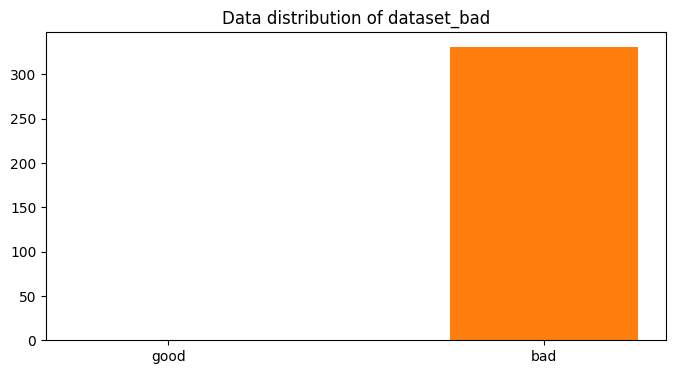

[  0 331]


In [ ]:
class_names = sorted(os.listdir("/content/drive/MyDrive/first_dataset"), reverse = True)

dataset_BAD = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset", classe = "bad",  scale = "every")
print("La grandezza del dataset BAD è:", len(dataset_BAD))

distribution(dataset_BAD, "dataset_bad")

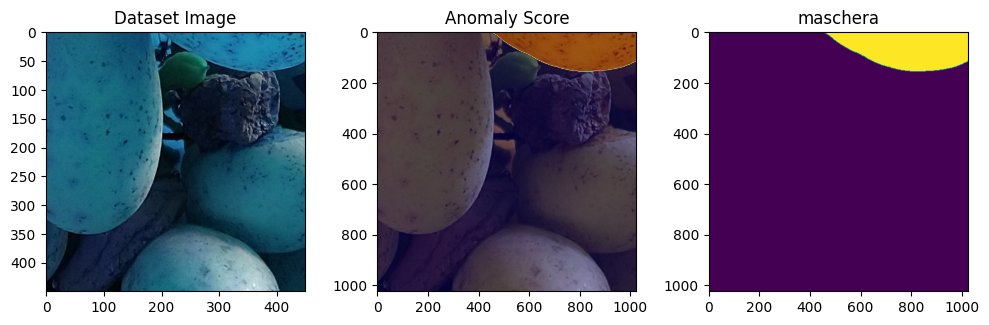

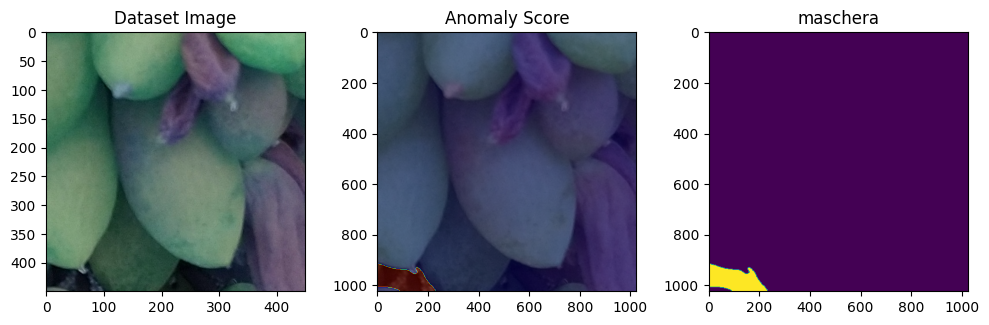

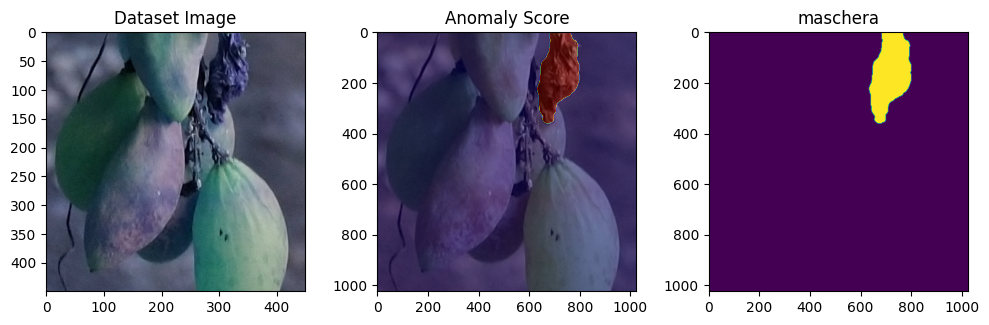

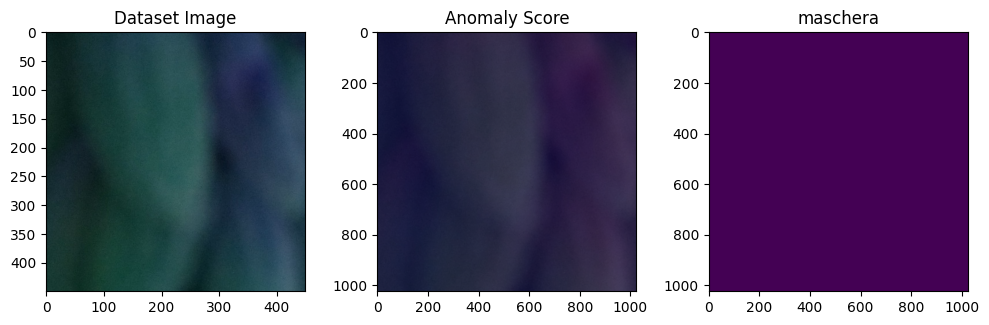

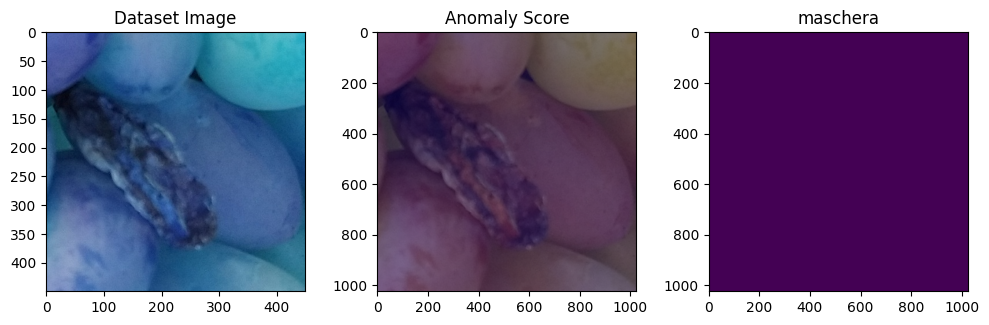

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd

textual_prompt_grapes = [
    ['shriveled. wilted. moldy. decayed. infected. rotten.irregular. deformed. crooked','grapes'],
    ['irregular shape', 'grapes']
]

property_text_prompts_grapes = 'the image of grapes have 1 red grapes, with a maximum of 1 anomaly. The anomaly would not exceed 0.1 object area. '

model.set_ensemble_text_prompts(textual_prompt_grapes, verbose=False)
model.set_property_text_prompts(property_text_prompts_grapes, verbose=False)

dataset_for_istance_bad = []

for idx in range(5):
    check_index(idx,dataset_BAD )
    image_path_grapes, label = dataset_BAD.image_paths[idx]

    image_grapes = cv2.imread(image_path_grapes)

    try:
      score, appendix = model(image_grapes)  # score mappa con puntaggio di anomalie
    except Exception as e:
      print(f"Errore durante l'esecuzione di model: {e}\n")
      continue

    similarity_map = appendix['similarity_map']

    image_show = cv2.cvtColor(image_grapes, cv2.COLOR_BGR2RGB)
    image_show = cv2.resize(image_show, (eval_resolution, eval_resolution))#effettuo resize
    similarity_map = cv2.resize(similarity_map, (eval_resolution, eval_resolution))
    score = cv2.resize(score, (eval_resolution, eval_resolution))

    features_estratte = calculate_additional_features(score)
    dataset_for_istance_bad.append(features_estratte)
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    axes[0].imshow(image_grapes)
    axes[0].set_title('Dataset Image')

    axes[1].imshow(image_show)
    axes[1].imshow(score, alpha=0.4, cmap='jet')
    axes[1].set_title('Anomaly Score')

    axes[2].imshow(score)
    axes[2].set_title('maschera')

    plt.tight_layout()
    plt.show()


In [ ]:
feature_names = ['mean_val', 'sum_value', 'std_deviation', 'max_val', 'variance',
                 'energy', 'autocorrelation', 'edge_detection', 'wavelet_coeffs_sum',
                 'gradient_sum', 'laplacian_sum', 'fft_sum']


df_for_istance_bad = pd.DataFrame(dataset_for_istance_bad)
df_for_istance_bad.columns = feature_names
df_for_istance_bad.describe()

mean_val     sum_value  std_deviation   max_val  variance       energy  \
count  5.000000      5.000000       5.000000  5.000000  5.000000     5.000000   
mean   0.005818   6100.371905       0.026774  0.138628  0.001355  1498.216178   
std    0.007097   7442.155119       0.028235  0.130361  0.001692  1887.805192   
min    0.000000      0.000000       0.000000  0.000000  0.000000     0.000000   
25%    0.000000      0.000000       0.000000  0.000000  0.000000     0.000000   
50%    0.002841   2979.168676       0.022363  0.180815  0.000500   532.882878   
75%    0.010109  10599.804943       0.050458  0.248061  0.002546  2776.863859   
max    0.016139  16922.885903       0.061051  0.264266  0.003727  4181.334153   

       autocorrelation  edge_detection  wavelet_coeffs_sum  gradient_sum  \
count         5.000000        5.000000            5.000000      5.000000   
mean          0.001420      109.802509         3097.181534    877.768262   
std           0.001790      117.402299         3782.244529    939.189432   
min           0.000000        0.000000            0.000000      0.000000   
25%           0.000000        0.000000            0.000000      0.000000   
50%           0.000503       92.457424         1531.954440    737.108642   
75%           0.002634      191.901122         5321.550357   1534.500692   
max           0.003962      264.653997         8632.402874   2117.231977   

       laplacian_sum       fft_sum  
count       5.000000  5.000000e+00  
mean       86.589303  2.039607e+06  
std        92.869895  1.988677e+06  
min         0.000000  0.000000e+00  
25%         0.000000  0.000000e+00  
50%        72.686595  2.258572e+06  
75%       150.039589  3.951661e+06  
max       210.220330  3.987802e+06

<Axes: >

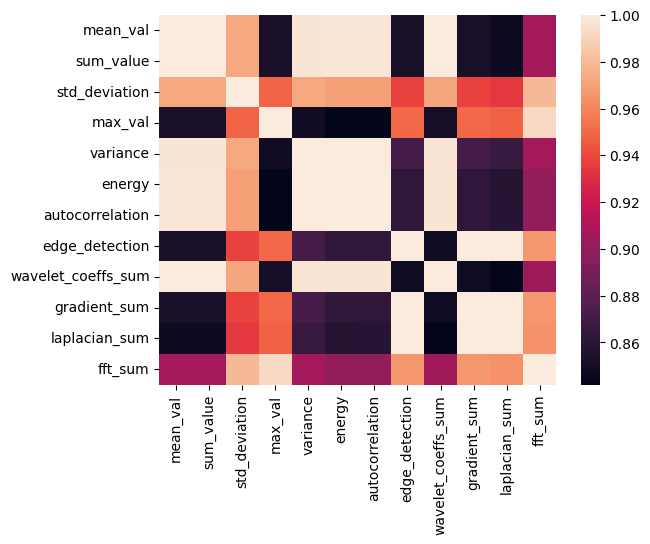

In [ ]:
import seaborn as sns

sns.heatmap(df_for_istance_bad.corr())

## Good Samples

La grandezza del dataset GOOD è: 951


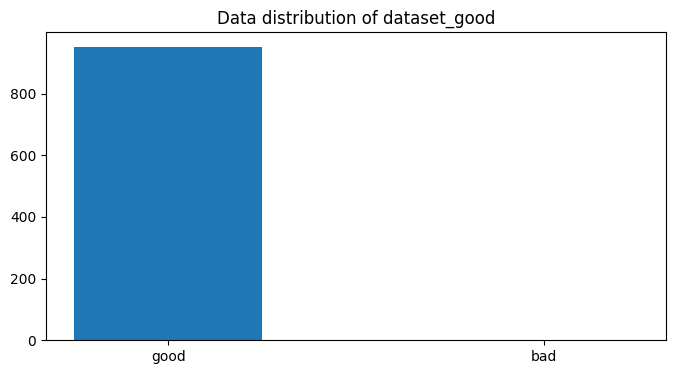

[951   0]


In [ ]:
class_names = sorted(os.listdir("/content/drive/MyDrive/first_dataset"), reverse = True)

dataset_GOOD = CanopiesDataset(root_dir = "/content/drive/MyDrive/first_dataset", classe = "good",  scale = "every")
print("La grandezza del dataset GOOD è:", len(dataset_GOOD))

distribution(dataset_GOOD, "dataset_good")

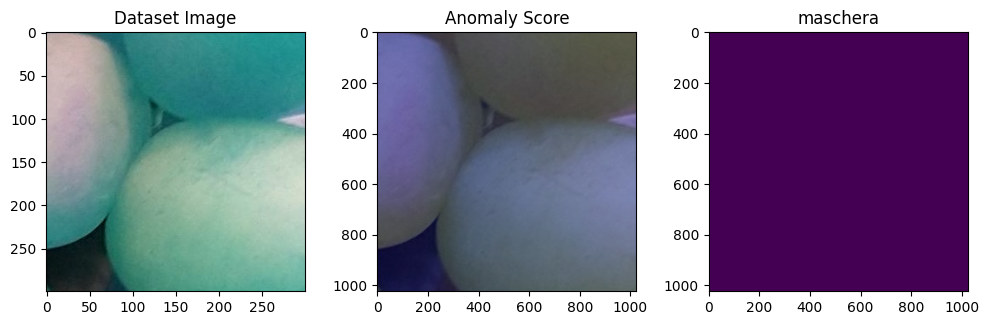

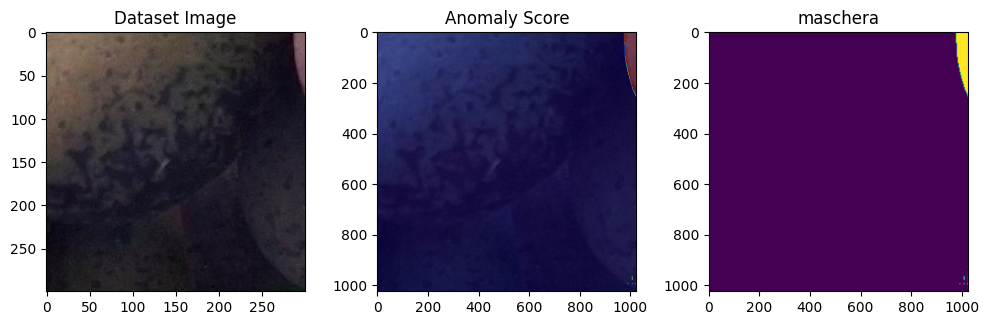

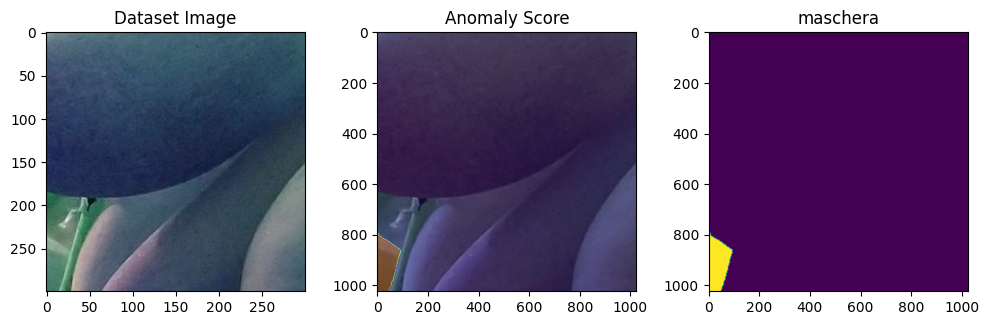

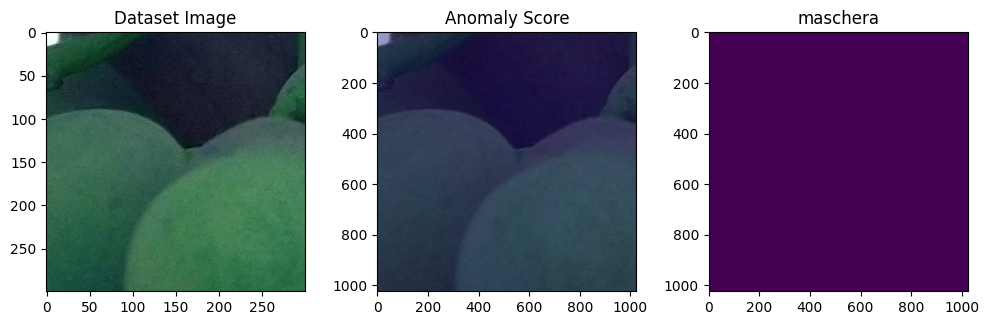

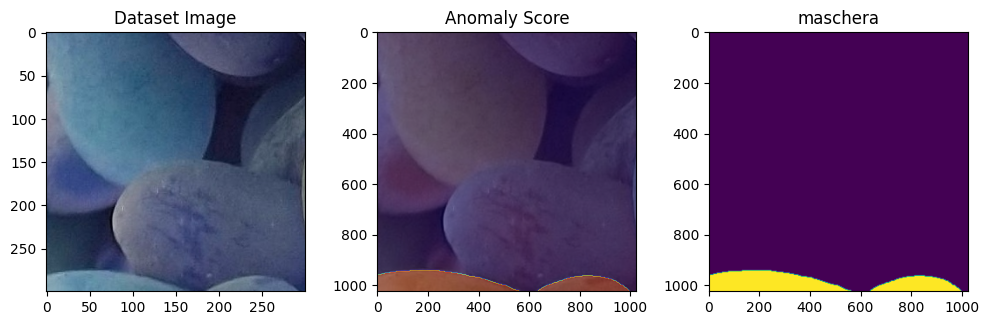

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

textual_prompt_grapes = [
    ['shriveled. wilted. moldy. decayed. infected. rotten.irregular. deformed. crooked','grapes'],
    ['irregular shape', 'grapes']
]

property_text_prompts_grapes = 'the image of grapes have 1 red grapes, with a maximum of 1 anomaly. The anomaly would not exceed 0.1 object area. '

model.set_ensemble_text_prompts(textual_prompt_grapes, verbose=False)
model.set_property_text_prompts(property_text_prompts_grapes, verbose=False)

dataset_for_istance_good = []
for idx in range(5):

    check_index(idx,dataset_GOOD )
    image_path_grapes, label = dataset_GOOD.image_paths[idx]

    image_grapes = cv2.imread(image_path_grapes)

    try:
      score, appendix = model(image_grapes)  # score mappa con puntaggio di anomalie
    except Exception as e:
      #print(f"Errore durante l'esecuzione di model: {e}\n")
      continue

    similarity_map = appendix['similarity_map']
    image_show = cv2.cvtColor(image_grapes, cv2.COLOR_BGR2RGB)
    image_show = cv2.resize(image_show, (eval_resolution, eval_resolution))#effettuo resize
    similarity_map = cv2.resize(similarity_map, (eval_resolution, eval_resolution))
    score = cv2.resize(score, (eval_resolution, eval_resolution))

    features_estratte = calculate_additional_features(score)

    dataset_for_istance_good.append(features_estratte)


    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    # Mostriamo le immagini sui tre assi
    axes[0].imshow(image_grapes)
    axes[0].set_title('Dataset Image')

    axes[1].imshow(image_show)
    axes[1].imshow(score, alpha=0.4, cmap='jet')
    axes[1].set_title('Anomaly Score')

    axes[2].imshow(score)
    axes[2].set_title('maschera')

    plt.tight_layout()
    plt.show()


In [ ]:
feature_names = ['mean_val', 'sum_value', 'std_deviation', 'max_val', 'variance',
                 'energy', 'autocorrelation', 'edge_detection', 'wavelet_coeffs_sum',
                 'gradient_sum', 'laplacian_sum', 'fft_sum']

df_for_istance_good = pd.DataFrame(dataset_for_istance_good)
df_for_istance_good.columns = feature_names
df_for_istance_good.describe()


mean_val     sum_value  std_deviation   max_val  variance       energy  \
count  5.000000      5.000000       5.000000  5.000000  5.000000     5.000000   
mean   0.003304   3464.134447       0.019246  0.134949  0.000793   864.417516   
std    0.005065   5310.899689       0.022982  0.143808  0.001252  1378.387042   
min    0.000000      0.000000       0.000000  0.000000  0.000000     0.000000   
25%    0.000000      0.000000       0.000000  0.000000  0.000000     0.000000   
50%    0.001504   1576.898279       0.012538  0.107413  0.000157   167.198524   
75%    0.002914   3055.044547       0.029487  0.258090  0.000870   920.641890   
max    0.012101  12688.729408       0.054203  0.309243  0.002938  3234.247164   

       autocorrelation  edge_detection  wavelet_coeffs_sum  gradient_sum  \
count         5.000000        5.000000            5.000000      5.000000   
mean          0.000812       95.744167         1812.439223    763.700837   
std           0.001298      126.057946         2760.652369   1007.397807   
min           0.000000        0.000000            0.000000      0.000000   
25%           0.000000        0.000000            0.000000      0.000000   
50%           0.000158       39.608223          818.733099    316.865786   
75%           0.000857      143.997068         1645.664004   1140.714065   
max           0.003046      295.115541         6597.799011   2360.924332   

       laplacian_sum       fft_sum  
count       5.000000  5.000000e+00  
mean       52.800168  1.640061e+06  
std        69.384906  1.810852e+06  
min         0.000000  0.000000e+00  
25%         0.000000  0.000000e+00  
50%        20.722196  1.112258e+06  
75%        81.797821  3.221211e+06  
max       161.480824  3.866836e+06

<Axes: >

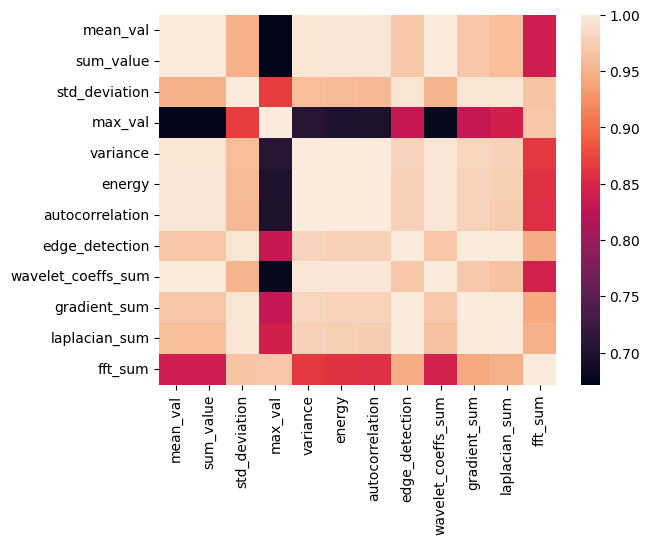

In [ ]:
import seaborn as sns

sns.heatmap(df_for_istance_good.corr())

# Esplorazione property prompt su un campione ridotto

Fase del progetto consiste nell'eseguire un'ottimizzazione delle combinazioni di feature su un subset di dati ridotto, al fine di determinare le migliori proprietà da utilizzare successivamente nel set di dati completo per il train-validation. In questa fase, vengono eseguite analisi delle caratteristiche su un campione di 60 campioni, al fine di identificare le combinazioni più efficaci. Queste combinazioni ottimizzate vengono poi applicate al set di dati completo per il train-validation.

In [ ]:
import random

def create_database_to_find_best_prompt_value(dataset ,num_obj, num_anomaly, anomaly_area, num_samples):

    textual_prompt_grapes = [  ['deformed. crooked ','grapes'], ['irregular', 'grapes'] ]
    property_text_prompts_dynamic = 'the image of grapes have '+num_obj+' dissimilar grapes, with a maximum of '+num_anomaly+' anomaly. The anomaly would not exceed '+anomaly_area+' object area. '
    model.set_ensemble_text_prompts(textual_prompt_grapes, verbose=False)
    model.set_property_text_prompts(property_text_prompts_dynamic, verbose=False)

    X = []
    Y = []

    random_indices = random.sample(range(len(dataset)), num_samples)
    for idx in random_indices:

        check_index(idx, dataset )
        image_path_grapes, label = dataset[idx]
        image_grapes = cv2.imread(image_path_grapes)

        try:
          score, appendix = model(image_grapes)  # score mappa con puntaggio di anomalie
        except Exception as e:
          #print(f"Errore durante l'esecuzione di model: {e}\n")
          continue

        similarity_map = appendix['similarity_map']
        image_show = cv2.cvtColor(image_grapes, cv2.COLOR_BGR2RGB)
        image_show = cv2.resize(image_show, (eval_resolution, eval_resolution))#effettuo resize
        similarity_map = cv2.resize(similarity_map, (eval_resolution, eval_resolution))
        score = cv2.resize(score, (eval_resolution, eval_resolution))

        additional_features = calculate_additional_features(score)

        # Append to the existing features
        X.append(additional_features)
        label_a = [label]
        Y.append(label_a)

    #print("\nnumero di campioni che sono usciti senza errore\n", len(X) )
    return X, Y

In [ ]:
def optimal_prompt_value(data_list):
  data_list.sort(key=lambda x: x[1], reverse=True)

  best_num_obj = set()
  best_num_anom = set()
  best_area = set()
  for idx, (hyperparameters, f1_score) in enumerate(data_list, start=1):

      if len(best_num_obj) < 3:
        best_num_obj.add(hyperparameters[0])
      if len(best_num_anom) < 3:
        best_num_anom.add(hyperparameters[1])
      if len(best_area) < 3:
        best_area.add(hyperparameters[2])
      if len(best_area) >= 3 and len(best_num_anom) >= 3 and len(best_num_obj) >= 3:
        break

  #print(best_num_obj)
  #print(best_num_anom)
  #print(best_area)

  return [best_num_obj, best_num_anom, best_area]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist(TMP, strg):
    # estraggo dati da TMP per fare plotting
    params = [f"({', '.join(param)})" for param, _ in TMP]
    f1_scores = [score for _, score in TMP]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=range(len(params)), y=f1_scores, hue=range(len(params)), palette='cividis', legend=False)
    plt.xlabel('Parametri')
    plt.ylabel('F1 Score')
    plt.title(f'F1 Score per differenti combinazioni di property-text, training su '+strg+' samples')
    plt.xticks([], [])
    plt.tight_layout()

    plt.show()


def box_plot(TMP, string):
  num_obj_values = [int(param[0]) for param, _ in TMP] #int value
  num_anom_values = [int(param[1]) for param, _ in TMP] #int value
  anom_area_values = [float(param[2]) for param, _ in TMP] #float value
  f1_scores = [score for _, score in TMP]

  df_num_obj = pd.DataFrame({'num_obj': num_obj_values, 'F1 Score': f1_scores})
  df_num_anom = pd.DataFrame({'num_anom': num_anom_values, 'F1 Score': f1_scores})
  df_anom_area = pd.DataFrame({'anom_area': anom_area_values, 'F1 Score': f1_scores})

  fig, axs = plt.subplots(1, 3, figsize=(18, 6))

  sns.boxplot(x='num_obj', y='F1 Score', data=df_num_obj, color='#659dc7', ax=axs[0])
  axs[0].set_xlabel('num_obj')
  axs[0].set_ylabel('F1 Score')
  axs[0].set_title('F1 Score vs num_obj')

  sns.boxplot(x='num_anom', y='F1 Score', data=df_num_anom, color='orange', ax=axs[1])
  axs[1].set_xlabel('num_anom')
  axs[1].set_ylabel('F1 Score')
  axs[1].set_title('F1 Score vs num_anom')

  sns.boxplot(x='anom_area', y='F1 Score', data=df_anom_area, color='#c92a42', ax=axs[2])
  axs[2].set_xlabel('anom_area')
  axs[2].set_ylabel('F1 Score')
  axs[2].set_title('F1 Score vs anom_area')

  plt.suptitle("Variazione della F1-score in base ai parametri del property-text, training su "+string+" samples", fontsize=20)
  plt.tight_layout()
  plt.show()

In [ ]:
def find_the_better_property_prompt_value(train_val_set):

    strg_bad = "BAD"
    strg_good = "GOOD"

    num_obj = ['2', '4', '6', '8' , '10']
    num_anomaly = [ '1', '3', '5', '7', '9']
    anomaly_area = ['0.2', '0.4', '0.7', '1.0']

    total_combinations = len(num_obj) * len(num_anomaly) * len(anomaly_area)
    combination_count = 0

    feature_names = ['mean_val', 'sum_value', 'std_deviation', 'max_val', 'variance',
    'energy', 'autocorrelation', 'edge_detection', 'wavelet_coeffs_sum',
    'gradient_sum', 'laplacian_sum', 'fft_sum']

    TMP_good = []
    TMP_bad = []

    dim = 60 #numero di samples per capire quali siano migliori valori del property text prompt

    for i, k, j in itertools.product(num_obj, num_anomaly, anomaly_area):
        combination_count += 1
        print(f"Combinazione:[{str(combination_count).zfill(3)}/{total_combinations}]", end=" ")
        print("  property-text: [num_obj: "+str(i).zfill(2)+", num_anomaly: "+str(k).zfill(2)+", anomaly_area: "+j+"]", end=" ")

        X, Y = create_database_to_find_best_prompt_value(train_val_set, i, k, j, dim)

        df_train_val = pd.DataFrame(X, columns=feature_names)
        df_train_val ['gt'] = np.array(Y).ravel()

        #approccio bad
        tmp_f1_bad, tmp_hyperparam_BAD = allenamento_validazione_BAD(strg_bad, df_train_val, 0.2, feature_names, False)#verbose false
        tmp_dynamic_prompt_BAD = [i, k, j] #in ordine sono num_obj, num_anomaly, anomaly_area
        element_bad = (tmp_dynamic_prompt_BAD, tmp_f1_bad)
        TMP_bad.append(element_bad)

        #approccio good
        tmp_f1_good, tmp_hyperparam_GOOD = allenamento_validazione_GOOD(strg_good, df_train_val, 0.2, feature_names, False)#verbose false
        tmp_dynamic_prompt_GOOD = [i, k, j] #in ordine sono num_obj, num_anomaly, anomaly_area
        element_good = (tmp_dynamic_prompt_GOOD, tmp_f1_good)
        TMP_good.append(element_good)

        print(f"  f1-score bad samples: {tmp_f1_bad:.4f} / f1-score good samples: {tmp_f1_good:.4f}")

    #print("bad")
    print("\n\n")
    plot_hist(TMP_bad, "bad")
    param_ottimi_bad = optimal_prompt_value(TMP_bad)
    print("\n\n")

    #print("good")
    plot_hist(TMP_good, "good")
    param_ottimi_good = optimal_prompt_value(TMP_good)
    print("\n\n")

    box_plot(TMP_bad, "bad")
    print("\n\n")
    box_plot(TMP_good, "good")

    merged_best_num_obj = param_ottimi_bad[0] | param_ottimi_good[0]
    merged_best_num_anom = param_ottimi_bad[1] | param_ottimi_good[1]
    merged_best_area = param_ottimi_bad[2] | param_ottimi_good[2]
    # Converti i set in array
    array_best_num_obj = list(merged_best_num_obj)
    array_best_num_anom = list(merged_best_num_anom)
    array_best_area = list(merged_best_area)

    return array_best_num_obj, array_best_num_anom, array_best_area


grafica i risultati ottenuti con i vari valori di property prompt

Combinazione:[001/100]   property-text: [num_obj: 02, num_anomaly: 01, anomaly_area: 0.2]   f1-score bad samples: 0.4013 / f1-score good samples: 0.8774
Combinazione:[002/100]   property-text: [num_obj: 02, num_anomaly: 01, anomaly_area: 0.4]   f1-score bad samples: 0.4399 / f1-score good samples: 0.7808
Combinazione:[003/100]   property-text: [num_obj: 02, num_anomaly: 01, anomaly_area: 0.7]   f1-score bad samples: 0.4275 / f1-score good samples: 0.8512
Combinazione:[004/100]   property-text: [num_obj: 02, num_anomaly: 01, anomaly_area: 1.0]   f1-score bad samples: 0.4312 / f1-score good samples: 0.8650
Combinazione:[005/100]   property-text: [num_obj: 02, num_anomaly: 03, anomaly_area: 0.2]   f1-score bad samples: 0.3911 / f1-score good samples: 0.8499
Combinazione:[006/100]   property-text: [num_obj: 02, num_anomaly: 03, anomaly_area: 0.4]   f1-score bad samples: 0.4297 / f1-score good samples: 0.9040
Combinazione:[007/100]   property-text: [num_obj: 02, num_anomaly: 03, anomaly_are

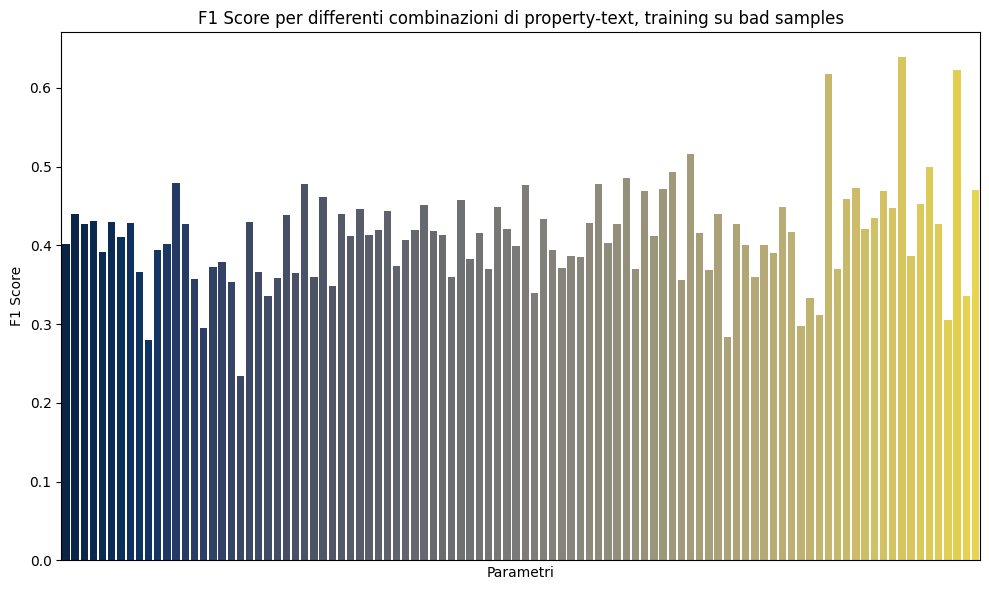

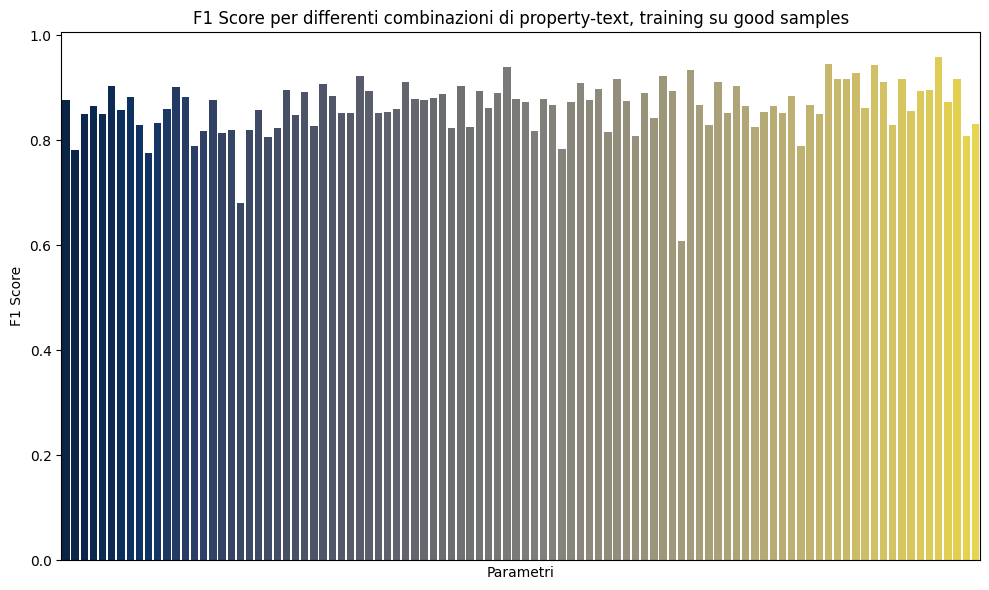

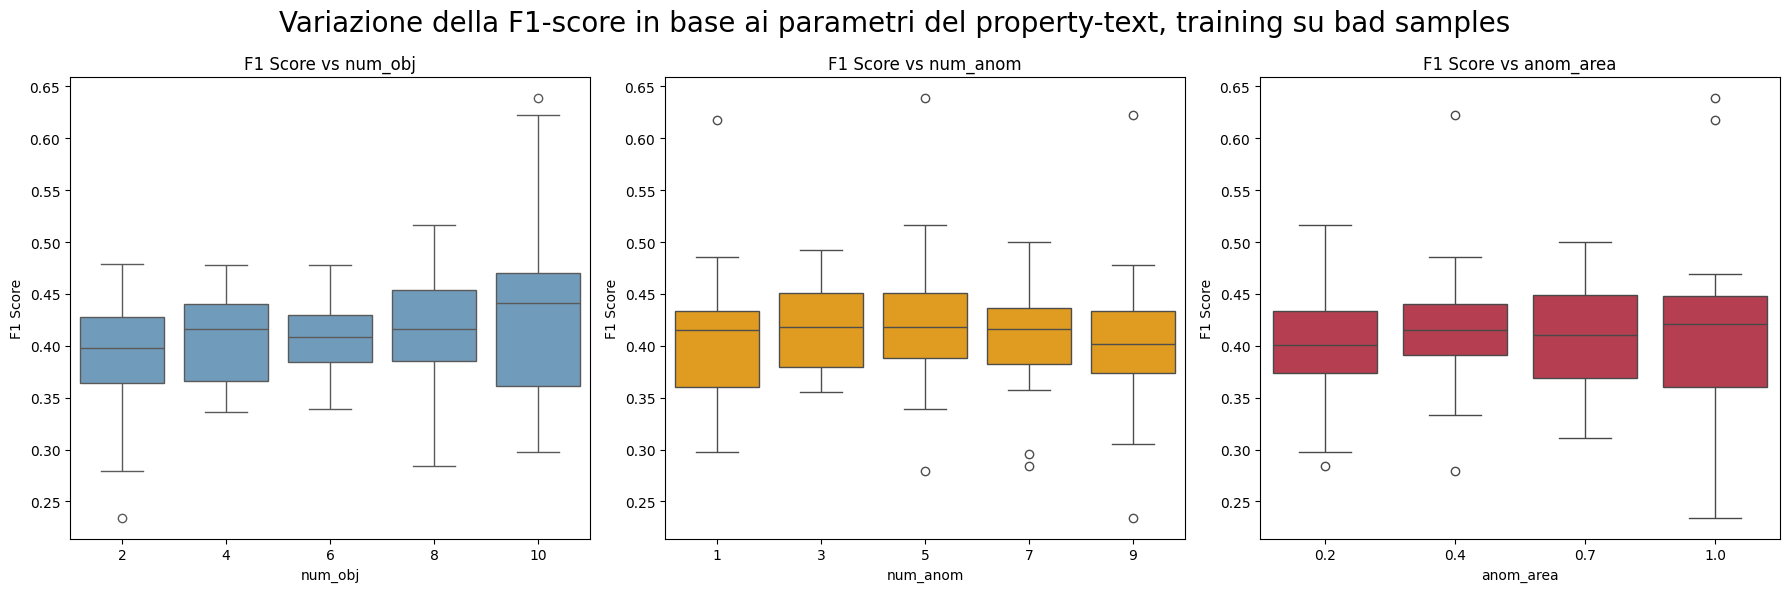

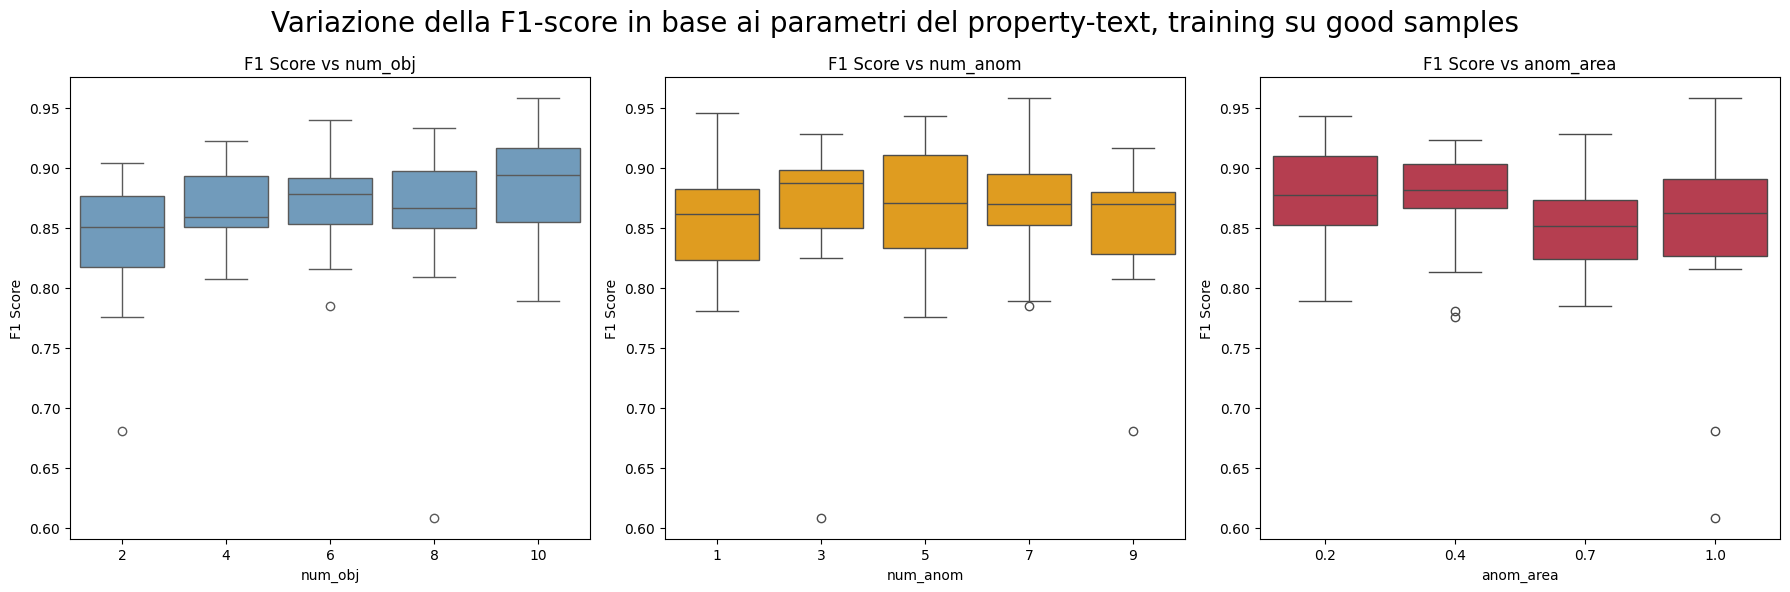

In [ ]:
num_obj,num_anomaly, anomaly_area = find_the_better_property_prompt_value(train_val_set)


In [ ]:
print("\n\nRisultati ottenuti da esplorazione valori di property prompt su un campione ridotto")
print(f"num_obj: {num_obj}")
print(f"num_anomaly: {num_anomaly}")
print(f"anomaly_area: {anomaly_area}")



Risultati ottenuti da esplorazione valori di property prompt su un campione ridotto
num_obj: ['8', '2', '10', '6']
num_anomaly: ['7', '1', '5', '9']
anomaly_area: ['0.7', '0.4', '0.2', '1.0']


#**TRAINING-VALIDATION**


Quando tu provi i vari property text prompt le features estratte sono uguali sia per approccio OneClassBad che OneClassGood è la parte a seguire che si distingue quindi è inutile fare per ogni property prompt due volte obtain_score matrix basta una volta. Molto probabilmente il BEST promperty prompt non sarà uguale per i due approcci ma vabe

In [ ]:

strg_bad = "BAD"
strg_good = "GOOD"

#num_obj,num_anomaly, anomaly_area prametri presi da blocco precendete

feature_names = ['mean_val', 'sum_value', 'std_deviation', 'max_val', 'variance',
'energy', 'autocorrelation', 'edge_detection', 'wavelet_coeffs_sum',
'gradient_sum', 'laplacian_sum', 'fft_sum']

absolute_best_f1_BAD = 0
absolute_best_hyperparam_combo_BAD = []
absolute_best_dynamic_prompt_combination_BAD = []


absolute_best_f1_GOOD = 0
absolute_best_hyperparam_combo_GOOD = []
absolute_best_dynamic_prompt_combination_GOOD = []

total_combinations = len(num_obj) * len(num_anomaly) * len(anomaly_area)
combination_count = 0

for i, k, j in itertools.product(num_obj, num_anomaly, anomaly_area):
    combination_count += 1
    print(f"Combinazione:[{str(combination_count).zfill(2)}/{total_combinations}]", end=" ")
    print("  property-text: [num_obj: "+str(i).zfill(2)+", num_anomaly: "+str(k).zfill(2)+", anomaly_area: "+j+"]")

    X, Y = obtain_score_matrix_dynamic_prompt(train_val_set, i, k, j)
    df_train_val = pd.DataFrame(X, columns=feature_names)

    df_train_val ['gt'] = np.array(Y).ravel()

    #QUI SI DIVIDONO I DUE APPROCCI GOOD  e  BAD
    #approccio bad
    print("OneClass bad", end='')
    overall_best_f1_bad, best_hyperparam_combo_BAD = allenamento_validazione_BAD(strg_bad, df_train_val, 0.3, feature_names, True)
    if overall_best_f1_bad > absolute_best_f1_BAD:
      absolute_best_f1_BAD = overall_best_f1_bad
      absolute_best_hyperparam_combo_BAD = best_hyperparam_combo_BAD
      absolute_best_dynamic_prompt_combination_BAD = [i, k, j] #in ordine sono num_obj, num_anomaly, anomaly_area

    #approccio good
    print("OneClass good", end='')
    overall_best_f1_good, best_hyperparam_combo_GOOD = allenamento_validazione_GOOD(strg_good, df_train_val, 0.3, feature_names, True)
    if overall_best_f1_good > absolute_best_f1_GOOD:
      absolute_best_f1_GOOD = overall_best_f1_good
      absolute_best_hyperparam_combo_GOOD = best_hyperparam_combo_GOOD
      absolute_best_dynamic_prompt_combination_GOOD = [i, k, j] #in ordine sono num_obj, num_anomaly, anomaly_area


print("-------------------------------------------CASO ONECLASS BAD-------------------------------------------")
print(f"f1-score migliore mai ottenuta è:{absolute_best_f1_BAD}, ottenuta con num_obj: {absolute_best_dynamic_prompt_combination_BAD[0]}, num_anomaly: {absolute_best_dynamic_prompt_combination_BAD[1]}, anomaly_area: {absolute_best_dynamic_prompt_combination_BAD[2]}")
print(f"con i seguenti iperparametri del modello OneClass svm: {absolute_best_hyperparam_combo_BAD}")
print("-------------------------------------------------------------------------------------------------------")

print("-------------------------------------------CASO ONECLASS GOOD------------------------------------------")
print(f"f1-score migliore mai ottenuta è:{absolute_best_f1_GOOD}, ottenuta con num_obj: {absolute_best_dynamic_prompt_combination_GOOD[0]}, num_anomaly: {absolute_best_dynamic_prompt_combination_GOOD[1]}, anomaly_area: {absolute_best_dynamic_prompt_combination_GOOD[2]}")
print(f"con i seguenti iperparametri del modello OneClass svm: {absolute_best_hyperparam_combo_GOOD}")
print("-------------------------------------------------------------------------------------------------------")


Combinazione:[01/64]   property-text: [num_obj: 08, num_anomaly: 07, anomaly_area: 0.7]
OneClass bad
Migliore combinazione di Iperparametri è: ('sigmoid', None, 0.1, 0.5, 0.1), con f1-score-mean: 0.3921

OneClass good
Migliore combinazione di Iperparametri è: ('poly', 3, 0.9, 0.1, 0.5), con f1-score-mean: 0.7926

Combinazione:[02/64]   property-text: [num_obj: 08, num_anomaly: 07, anomaly_area: 0.4]
OneClass bad
Migliore combinazione di Iperparametri è: ('sigmoid', None, 0.5, 0.1, 0.9), con f1-score-mean: 0.3882

OneClass good
Migliore combinazione di Iperparametri è: ('rbf', None, 0.9, None, 0.9), con f1-score-mean: 0.7863

Combinazione:[03/64]   property-text: [num_obj: 08, num_anomaly: 07, anomaly_area: 0.2]
OneClass bad
Migliore combinazione di Iperparametri è: ('poly', 4, 0.5, 0.9, 0.5), con f1-score-mean: 0.3784

OneClass good
Migliore combinazione di Iperparametri è: ('poly', 3, 0.9, 0.5, 0.1), con f1-score-mean: 0.8107

Combinazione:[04/64]   property-text: [num_obj: 08, num_an

#**Testing bad samples**




In [ ]:
#allenamento fatto su
#testing fatto su test_set

#iperparametri modello OneClass
num_obj_best_bad =  absolute_best_dynamic_prompt_combination_BAD[0]
num_anomaly_best_bad = absolute_best_dynamic_prompt_combination_BAD[1]
anomaly_area_best_bad = absolute_best_dynamic_prompt_combination_BAD[2]

#iperparametri Property prompt
kernel_best_bad = absolute_best_hyperparam_combo_BAD[0]
degree_best_bad = absolute_best_hyperparam_combo_BAD[1]
gamma_best_bad = absolute_best_hyperparam_combo_BAD[2]
coef_best_bad = absolute_best_hyperparam_combo_BAD[3]
nu_best_bad = absolute_best_hyperparam_combo_BAD[4]

#LAVORO SUL SET DI ALLENAMENTO
X_train_last, Y_train_last = obtain_score_matrix_dynamic_prompt(train_val_set, num_obj_best_bad, num_anomaly_best_bad, anomaly_area_best_bad)

df_train_val = pd.DataFrame(X_train_last, columns=feature_names)

df_train_val ['gt'] = np.array(Y_train_last).ravel()
df_train_last = df_train_val[df_train_val['gt'] == 1]

df_train_last.drop(columns=['gt'], inplace=True)
X_train_last = df_train_last.to_numpy()
X_norm_train_last = norm_dataset(X_train_last)

#LAVORO SUL SET DI TESTING
X_test_last, Y_test_last_bad = obtain_score_matrix_dynamic_prompt(test_set, num_obj_best_bad, num_anomaly_best_bad, anomaly_area_best_bad)
df_test = pd.DataFrame(X_test_last, columns=feature_names)

X_test_last = df_test.to_numpy()
X_norm_test_last = norm_dataset(X_test_last) #normalizzo test dataset

#Svolgo allenamento e predizione
model_final = One_class_svm_init(kernel_best_bad, nu_best_bad, gamma_best_bad, degree_best_bad, coef_best_bad)
predictions_final_bad = OneClass_fit_predict("BAD", model_final, X_norm_train_last, X_norm_test_last)
f1_final_bad, accuracy_final = evaluate_metrics(predictions_final_bad, Y_test_last_bad)

from sklearn.metrics import classification_report
class_report = classification_report(Y_test_last_bad, predictions_final_bad)

print(f"F1-score ottenuto con modello BAD è: {f1_final_bad}")

print("Classification Report:")
print(class_report)


F1-score ottenuto con modello BAD è: 0.5669291338582678
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.40      0.44       108
           1       0.53      0.62      0.57       117

    accuracy                           0.51       225
   macro avg       0.51      0.51      0.50       225
weighted avg       0.51      0.51      0.51       225



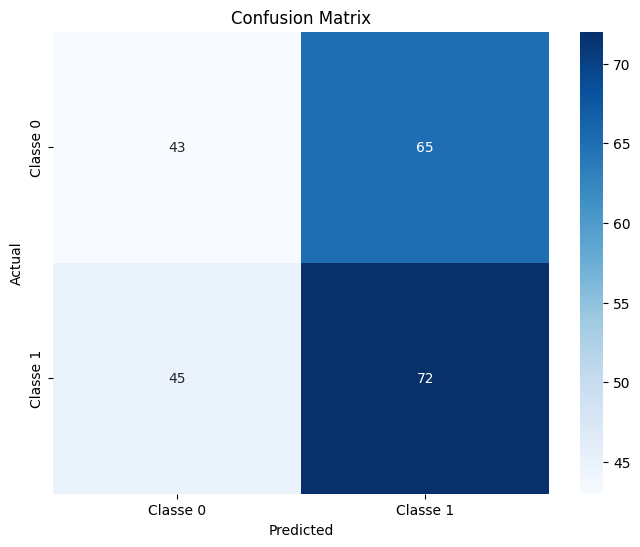

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test_last_bad, predictions_final_bad)
class_labels = ['Classe 0', 'Classe 1']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#**Testing good samples**

In [ ]:
#allenamento fatto su
#testing fatto su test_set

#iperparametri modello OneClass
num_obj_best_good =  absolute_best_dynamic_prompt_combination_GOOD[0]
num_anomaly_best_good = absolute_best_dynamic_prompt_combination_GOOD[1]
anomaly_area_best_good = absolute_best_dynamic_prompt_combination_GOOD[2]

#iperparametri Property prompt
kernel_best_good = absolute_best_hyperparam_combo_GOOD[0]
degree_best_good = absolute_best_hyperparam_combo_GOOD[1]
gamma_best_good = absolute_best_hyperparam_combo_GOOD[2]
coef_best_good = absolute_best_hyperparam_combo_GOOD[3]
nu_best_good = absolute_best_hyperparam_combo_GOOD[4]

#LAVORO SUL SET DI ALLENAMENTO
X_train_last, Y_train_last = obtain_score_matrix_dynamic_prompt(train_val_set, num_obj_best_good, num_anomaly_best_good, anomaly_area_best_good)
df_train_val = pd.DataFrame(X_train_last, columns=feature_names)
df_train_val ['gt'] = np.array(Y_train_last).ravel()
df_train_last = df_train_val[df_train_val['gt'] == 0]
df_train_last.drop(columns=['gt'], inplace=True)
X_train_last = df_train_last.to_numpy()
X_norm_train_last = norm_dataset(X_train_last)

#LAVORO SUL SET DI TESTING
X_test_last, Y_test_last_good = obtain_score_matrix_dynamic_prompt(test_set, num_obj_best_good, num_anomaly_best_good, anomaly_area_best_good)
df_test = pd.DataFrame(X_test_last, columns=feature_names)

X_test_last = df_test.to_numpy()
X_norm_test_last = norm_dataset(X_test_last) #normalizzo test dataset

#Svolgo allenamento e predizione
model_final = One_class_svm_init(kernel_best_good, nu_best_good, gamma_best_good, degree_best_good, coef_best_good)
predictions_final_good = OneClass_fit_predict("GOOD", model_final, X_norm_train_last, X_norm_test_last)
f1_final_good, accuracy_final = evaluate_metrics(predictions_final_good, Y_test_last_good)

from sklearn.metrics import accuracy_score, classification_report
class_report_good = classification_report(Y_test_last_good, predictions_final_good)

print(f"F1-score ottenuto con modello GOOD è: {f1_final_good}")

print("Classification Report:")
print(class_report_good)


F1-score ottenuto con modello GOOD è: 0.6934673366834171
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.24      0.34        68
           1       0.57      0.88      0.69        78

    accuracy                           0.58       146
   macro avg       0.61      0.56      0.52       146
weighted avg       0.60      0.58      0.53       146



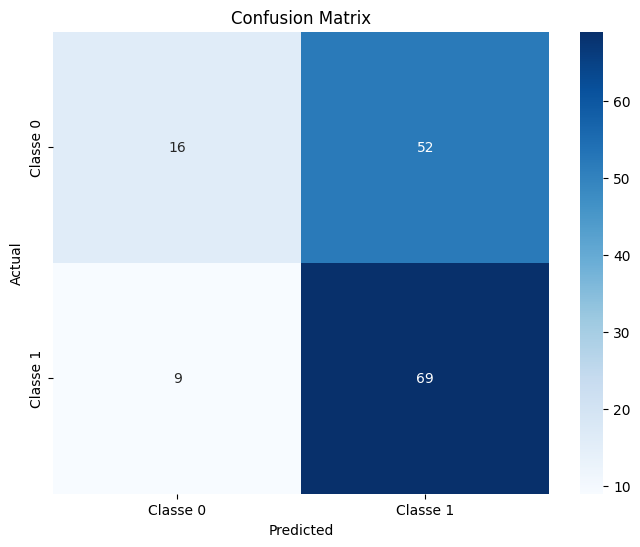

In [ ]:
conf_matrix_good = confusion_matrix(Y_test_last_good, predictions_final_good)
class_labels = ['Classe 0', 'Classe 1']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_good, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
